<h1>Ejercicio 10</h1>

10.(a). Grafique el espectro angular de potencias de las fluctuaciones en temperatura, en el plano $l(l+1)C_l/(2\pi)$ versus $l$. ¿Por qué es conveniente utilizar esta expresión en la coordenada $y$? ¿Qué representa el valor de $l$?

In [1]:
import matplotlib.pyplot as plt
from classy import Class
import numpy as np

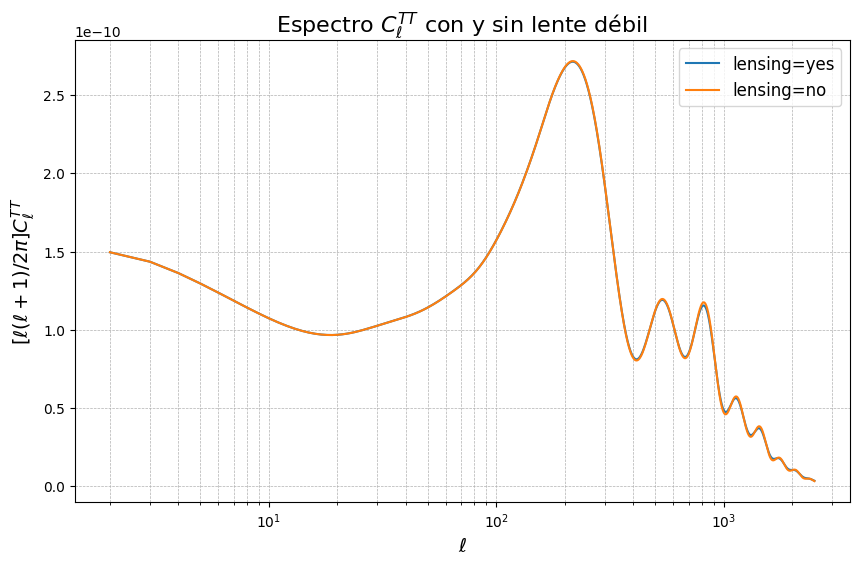

In [2]:
import matplotlib.pyplot as plt
from classy import Class
import numpy as np

#Parámetros
omega_b = 0.0225
omega_cdm = 0.12
h = 0.67556
A_s = 2.1e-9
n_s = 0.965
tau_reio = 0.6
Omega_k = 0
omega_lambda = 0.684

#Gráfico
plt.figure(figsize=(10, 6))

for lensing in ["yes", "no"]:  # Con y sin efecto de lente débil
    LambdaCDM = Class()
    LambdaCDM.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "Omega_k": Omega_k,
        "lensing": lensing,
        "output": "tCl,pCl,lCl",
        "Omega_Lambda": omega_lambda
    })
    LambdaCDM.compute()
    
    # Espectro TT
    cls = LambdaCDM.lensed_cl(2500) if lensing == "yes" else LambdaCDM.raw_cl(2500)
    ell = cls["ell"][2:]  # Ignorar los primeros multipolos
    clTT = cls["tt"][2:]
    
    # Grafico
    label = f"lensing={lensing}"
    plt.plot(ell, clTT * ell * (ell + 1) / (2 * np.pi), label=label)
    
    LambdaCDM.empty()  # Liberar memoria


plt.xscale("log")
plt.yscale("linear")
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{TT}$", fontsize=14)
plt.title("Espectro $C_\ell^{TT}$ con y sin lente débil", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

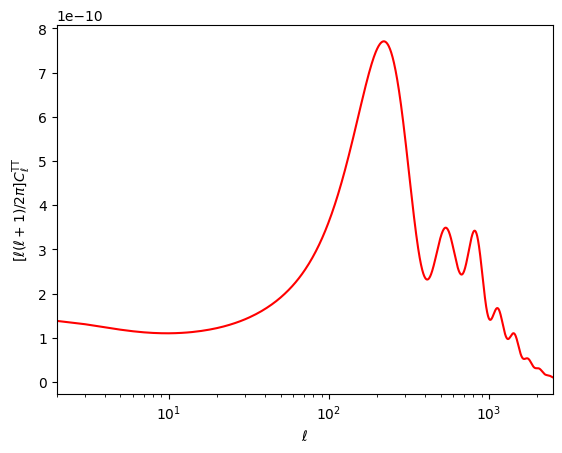

In [3]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842, 'Omega_Lambda':0.684})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
cls.keys()

ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')

Es conveniente graficar esta expresión ya que para $l$ chicos (escalas angulares grandes), el factor $l(l+1)C_l/(2\pi)$ resulta casi constante. El valor $l$ representa la escala angular $l = \pi/\theta$ en el cielo. 

Nota para recordar:

$\Omega_m=\Omega_{cdm}+\Omega_b$

$1=\Omega_m + \Omega_{\Lambda} + \Omega_K$

10.b.iii. Varío la densidad de materia oscura $\Omega_{cdm}h^2$ entre 0.0 y 0.5, para un Universo plano (K=0) dejando fijo $\Omega_b h^2 = 0.049$:

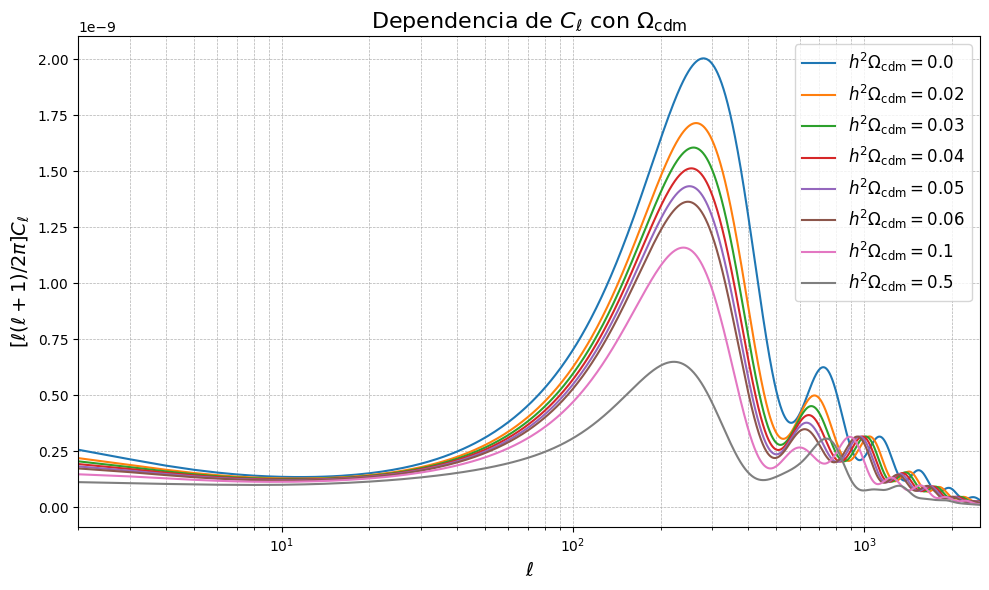

In [4]:
import matplotlib.pyplot as plt
from classy import Class
import numpy as np

# Lista de valores de omega_cdm a explorar
omega_cdm_values = [0.0, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.5]

#Gráfico
plt.figure(figsize=(10, 6))
plt.xscale("log")
plt.yscale("linear")
plt.xlim(2, 2500)
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell$", fontsize=14)
plt.title(r"Dependencia de $C_\ell$ con $\Omega_\mathrm{cdm}$", fontsize=16)

# Itero sobre los valores de omega_cdm
for omega_cdm in omega_cdm_values:
    # Configuro CLASS para el valor actual de omega_cdm
    LambdaCDM = Class()
    LambdaCDM.set({
        "omega_b": 0.049,  # Valor fijo de Omega_b
        "omega_cdm": omega_cdm,
        "h": 0.67556,
        "A_s": 2.215e-9,
        "n_s": 0.9619,
        "tau_reio": 0.0925,
        "Omega_k": 0,  # Universo plano
        "YHe": 0.24 
    })
    LambdaCDM.set({
        "output": "tCl,pCl,lCl,mPk",  # Salidas relevantes
        "lensing": "yes",
        "P_k_max_1/Mpc": 3.0
    })
    LambdaCDM.compute()

    # Espectros
    cls = LambdaCDM.lensed_cl(2500)
    ell = cls["ell"][2:]  # Ignorar l=0 y l=1
    clTT = cls["tt"][2:]

    # Grafico el espectro
    plt.plot(ell, clTT * ell * (ell + 1) / (2. * np.pi), label=f"$h^2\\Omega_\\mathrm{{cdm}} = {omega_cdm}$")

    # Limpiar memoria
    LambdaCDM.struct_cleanup()

plt.legend(fontsize=12, loc="upper right")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

Al aumentar $\Omega_{cdm}h^2$, disminuye tanto la altura como la posición de los picos. La altura de los picos se ve afectada porque recordemos que $\Theta(k,\eta_0,\mu)=\Theta(k,\eta_*,\mu)e^{ik\mu(\eta_* - \eta_0)} e^{-\tau_{rei}}$, siendo $\tau_{rei}=\int{\frac{\gamma \sigma_T (1+z)^2}{H(z)}dz}$. Al aumentar $\Omega_{cdm}h^2$, el factor de supresión $e^{-\tau_{rei}}$ se vuelve más importante.
Por otro lado, la posición de los picos se ve corrida a valor menores de $l$ cuando la densidad de materia oscura crece. Esto es porque, recordando que $l_{peak}\sim 1/r_s(\eta_*)$, al crecer $\Omega_{cdm}h^2$ crece $r_s(\eta_*)$, llevando los picos hacia valores más chicos. Tambien aumenta el valor de $z_{eq}$, haciendo que las perturbaciones tengan más tiempo para crecer. También disminuye el efecto de los términos de Sachs-Wolfe.

10.b.iv. Varío la densidad de bariones $\Omega_b h^2$ entre 0.01 y 0.06:

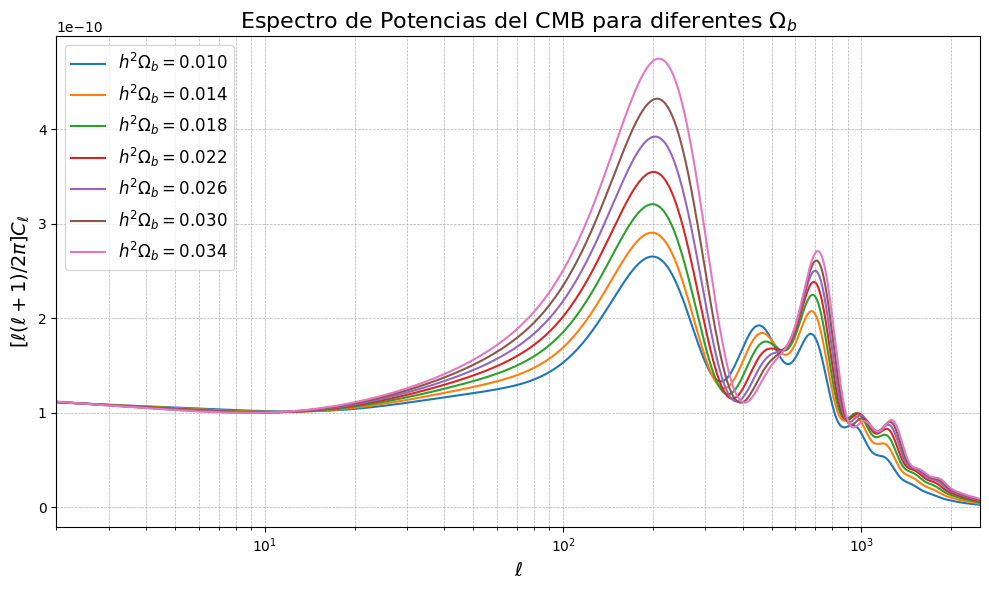

In [5]:
import matplotlib.pyplot as plt
from classy import Class
from math import pi

# Parámetros fijos
h = 0.67556
A_s = 2.215e-9
n_s = 0.9619
tau_reio = 0.0925
omega_k = 0.0  # Universo plano

# Valores de Omega_b a variar
omega_b_values = [0.01, 0.014, 0.018, 0.022, 0.026, 0.03, 0.034]

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre los valores de Omega_b
for omega_b in omega_b_values:
    # Calcular Omega_m y ajustar Omega_lambda
    omega_m = omega_cdm + omega_b
    omega_lambda = 1 - omega_m - omega_k
    
    # Configurar CLASS
    LambdaCDM = Class()
    LambdaCDM.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "Omega_k": omega_k,  # Universo plano
        "Omega_Lambda": omega_lambda  # Ajustado para mantener Omega_total = 1
    })
    LambdaCDM.set({
        "output": "tCl,pCl,lCl",  # Solo queremos CMB
        "lensing": "yes"
    })
    LambdaCDM.compute()
    
    # Obtener los espectros
    cls = LambdaCDM.lensed_cl(2500)
    ell = cls["ell"][2:]  # Ignorar los dos primeros valores
    clTT = cls["tt"][2:]
    
    # Graficar
    plt.plot(ell, clTT * ell * (ell + 1) / (2 * pi), label=f"$h^2\\Omega_b = {omega_b:.3f}$")
    
    # Liberar memoria
    LambdaCDM.empty()

# Configuración del gráfico
plt.xscale("log")
plt.yscale("linear")
plt.xlim(2, 2500)
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell$", fontsize=14)
plt.title("Espectro de Potencias del CMB para diferentes $\\Omega_b$", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Aumentar $\Omega_b$ hace que cambie $c_s$, con lo cual la posición de los picos cambiará. Además, la altura también cambia porque esto afecta a $\tau_{rei}$. Como vemos, el primer y tercer pico aumentan de altura en relación al segundo, que baja. Así, la altura relativa de los picos es muy sensible a la variación en el contenido de bariones del Universo. Como debe valer siempre $\Omega_m=\Omega_{cdm}+\Omega_b=1-\Omega_{\Lambda}-\Omega_K$, algún otro parámetro debe cambiar, y elegí que cambie $\Omega_{\Lambda}$. Las curvas con mayor $\Omega_b$ tiene menor $\Omega_{\Lambda}$.

Ahora dejo fijo $\Omega_m = 0.316$ la cantidad de materia total en el Universo.

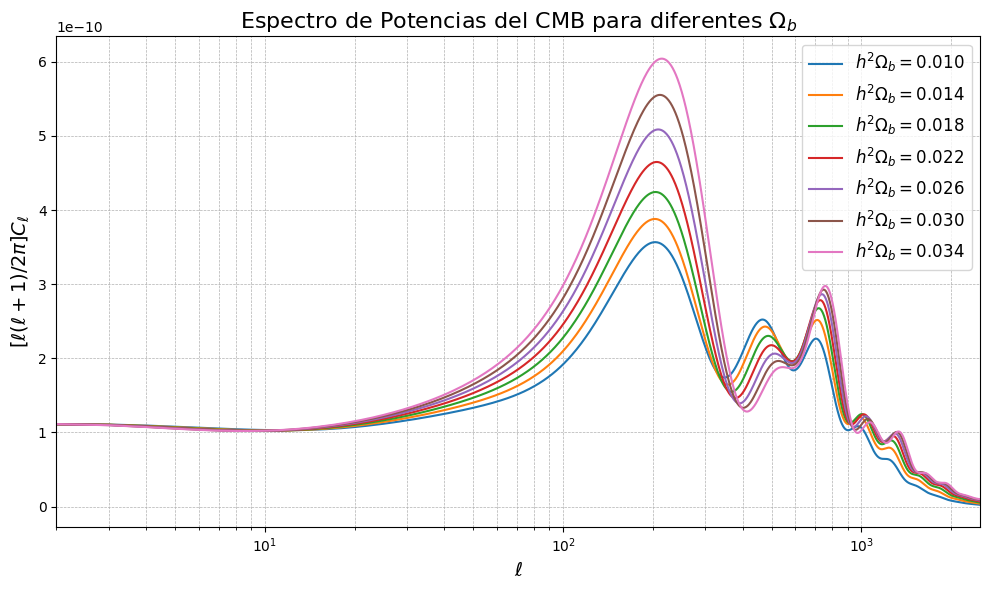

In [6]:
import matplotlib.pyplot as plt
from classy import Class
from math import pi

# Parámetros fijos
h = 0.67556
A_s = 2.215e-9
n_s = 0.9619
tau_reio = 0.0925
Omega_m = 0.316  # Valor fijo de Omega_m
omega_k = 0.0    # Universo plano

# Valores de Omega_b a variar
omega_b_values = [0.01, 0.014, 0.018, 0.022, 0.026, 0.03, 0.034]

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre los valores de Omega_b
for omega_b in omega_b_values:
    # Calcular omega_cdm para mantener Omega_m constante
    omega_cdm = Omega_m - omega_b

    # Configurar CLASS
    LambdaCDM = Class()
    LambdaCDM.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "Omega_k": omega_k,  # Universo plano
        "Omega_Lambda": 1 - Omega_m  # Ajustado para mantener Omega_total = 1
    })
    LambdaCDM.set({
        "output": "tCl,pCl,lCl",  # Solo queremos CMB
        "lensing": "yes"
    })
    LambdaCDM.compute()
    
    # Obtener los espectros
    cls = LambdaCDM.lensed_cl(2500)
    ell = cls["ell"][2:]  # Ignorar los dos primeros valores
    clTT = cls["tt"][2:]
    
    # Graficar
    plt.plot(ell, clTT * ell * (ell + 1) / (2 * pi), label=f"$h^2\\Omega_b = {omega_b:.3f}$")
    
    # Liberar memoria
    LambdaCDM.empty()

# Configuración del gráfico
plt.xscale("log")
plt.yscale("linear")
plt.xlim(2, 2500)
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell$", fontsize=14)
plt.title("Espectro de Potencias del CMB para diferentes $\\Omega_b$", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


10.b.i. Varío la curvatura $\Omega_K$ entre -0.07 y 0.07, dejando fijo $\Omega_m=\Omega_{cdm}+\Omega_b$:

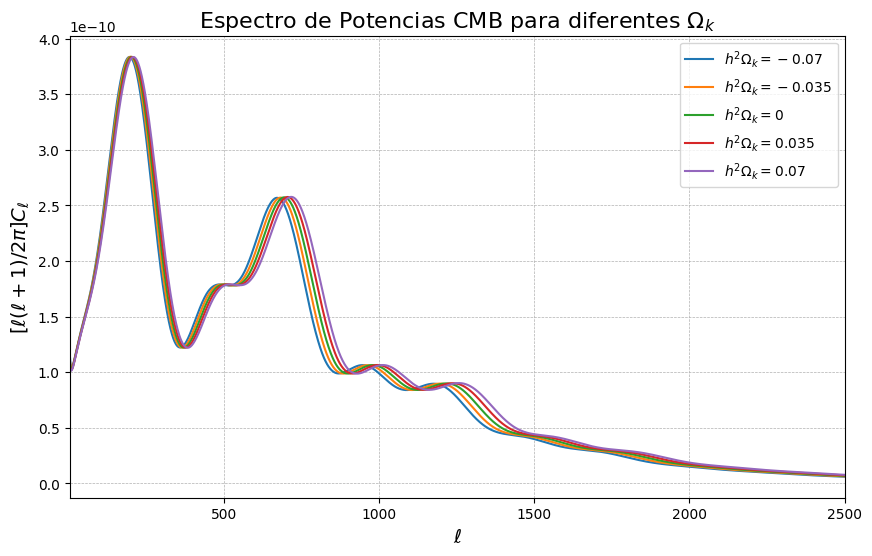

In [7]:
import matplotlib.pyplot as plt
from classy import Class
from math import pi

# Parámetros fijos
omega_b = 0.0225
omega_cdm = 0.5
h = 0.67556
A_s = 2.215e-9
n_s = 0.9619
tau_reio = 0.058
omega_lambda = 0.684
# Valores de Omega_k a variar
Omega_k_values = [-0.07, -0.035, 0, 0.035, 0.07]

plt.figure(figsize=(10, 6))

for Omega_k in Omega_k_values:
    # Configurar CLASS
    LambdaCDM = Class()
    LambdaCDM.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "Omega_k": Omega_k,
        "YHe": 0.24,  # Valor fijo de la fracción de helio primordial
        "Omega_Lambda": omega_lambda
    })
    LambdaCDM.set({
        "output": "tCl,pCl,lCl",
        "lensing": "yes"
    })
    LambdaCDM.compute()
    
    # Obtener los espectros
    cls = LambdaCDM.lensed_cl(2500)
    ell = cls["ell"][2:]  # Ignorar los dos primeros valores
    clTT = cls["tt"][2:]
    
    # Graficar
    plt.plot(ell, clTT * ell * (ell + 1) / (2 * pi), label=f"$h^2\\Omega_k = {Omega_k}$")
    
    # Liberar memoria
    LambdaCDM.empty()

# Configuración del gráfico
plt.xscale("linear")
plt.yscale("linear")
plt.xlim(2, 2500)
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell$", fontsize=14)
plt.title("Espectro de Potencias CMB para diferentes $\\Omega_k$", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

Al aumentar $\Omega_k$, la posición de los picos se corre hacia $l$ mas grandes. Aumentar $\Omega_k$ significa físicamente que el Universo se está "abriendo", con lo cual, para una dada escala en la superficie de último scattering, el ángulo correspondiente en el caso plano es más grande que el ángulo correspondiente en un Universo abierto, con lo cual el $l$ aumenta. Caso contrario cuando $\Omega_k$ se hace más y más negativo.

10.b.ii. Varío $\tau_{reio}$ entre 0.01 y 0.1, para Universo plano (K=0) dejando fijos el resto de parámetros.

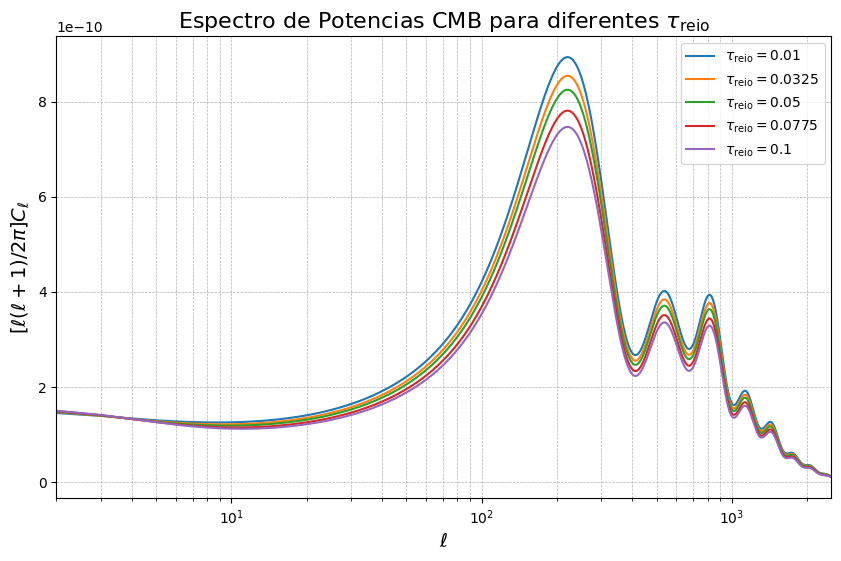

In [8]:
import matplotlib.pyplot as plt
from classy import Class
from math import pi

# Parámetros fijos
omega_b = 0.0225
omega_cdm = 0.12
h = 0.67556
A_s = 2.215e-9
n_s = 0.9619
Omega_k = 0
omega_lambda = 0.684

# Valores de tau_reio a variar
tau_reio_values = [0.01, 0.0325, 0.05, 0.0775, 0.1]

plt.figure(figsize=(10, 6))

for tau_reio in tau_reio_values:
    # Configurar CLASS
    LambdaCDM = Class()
    LambdaCDM.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "Omega_k": Omega_k,
        "Omega_Lambda": omega_lambda
    })
    LambdaCDM.set({"output": "tCl,pCl,lCl", "lensing": "yes"})  # Sin P_k_max_1/Mpc
    LambdaCDM.compute()
    
    # Obtener y procesar los resultados
    cls = LambdaCDM.lensed_cl(2500)
    ell = cls["ell"][2:]  # Ignorar los dos primeros valores
    clTT = cls["tt"][2:]
    
    # Graficar
    plt.plot(ell, clTT * ell * (ell + 1) / (2 * pi), label=f"$\\tau_\\text{{reio}} = {tau_reio}$")
    
    # Liberar memoria
    LambdaCDM.empty()

# Configuración del gráfico
plt.xscale("log")
plt.yscale("linear")
plt.xlim(2, 2500)
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell$", fontsize=14)
plt.title("Espectro de Potencias CMB para diferentes $\\tau_\\text{reio}$", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

Vimos que $\Theta(k,\eta_0,\mu)=\Theta(k,\eta_*,\mu)e^{ik\mu(\eta_* - \eta_0)} e^{-\tau_{rei}}$. Esta supresión solo afecta las escalas angulares chicas $\theta \sim \frac{\pi}{l} < \frac{\eta_{rei}}{\eta_0}$, que cumplen $k\eta_{rei}>1$. Esto se puede ver en el gráfico, que como vemos, para $l$ pequeños, el gráfico cambia muy poco en comparación con los $l$ mayores, al variar $\tau_{rei}$.

¿Es posible hallar una combinación de $A_s$ y $n_s$ para $\tau_{reio}=0$ que recupere cualitativamente los mismos resultados para $\tau_{reio} \neq 0$? Si, por la existencia de degeneración entre los parámetros. El $A_s$ (la amplitud inicial) multiplica globalmente a los $C_l$; el $n_s$ cambia la dependencia en $l$. Si cambio $n_s \rightarrow n_s+\alpha$, se introduce un factor $(\frac{l}{l_p})^{\alpha}$.

<h1>Ejercicio 12</h1>

La gran novedad de los modos B es que, en principio, la correlación $C_l^{BB}$ es nula si consideramos sólo perturbaciones escalares. De modo que si observaramos un valor no nulo para dicha correlación, estaríamos en condiciones de afirmar la existencia de pertubaciones tensoriales primordiales, i.e., ondas gravitacionales primordiales. No obstante hay que tener cuidado con la afirmación anterior debido a que existen fenómenos como el efecto de lente gravitacional o efectos no lineales que pueden transformar modos E (e.g. producidos por perturbaciones escalares) en modos B. Por otra parte, como ya hemos discutido, las observaciones de las anisotropías propias de la RCF, y en particular las de la polarización, requieren de un complejo proceso denominado separación de componentes que permite separar la luz emitida por las fuentes cosmológicas que pretendemos observar de la luz proveniente de fuentes astrofísicas que consideramos como contaminantes. 

El South Pole Telescope y el experimento POLARBEAR midieron valores no nulos de la correlación BB en el año 2013 y 2014 respectivamente. Sin embargo no concluyeron la existencia de ondas gravitatorias primordiales. ¿Por qué? Esto se debe al efecto de lente gravitacional puede convertir modos E en modos B. Este fenómeno ocurre cuando la luz del CMB atraviesa estructuras de materia en el Universo, tales como cúmulos galácticos, que distorsionan la polarización inicial. Esto genera una señal $C_l^{BB}$ no nula.

A su vez en el año 2014 el experimento BICEP2 también publicó valores no nulos de la correlación BB, pero esta vez favorables a la existencia de ondas gravitatorias primordiales. Luego de un gran desconcierto internacional la comunidad científica entendió que estos resultados no afirmaban la existencia de dichas ondas. ¿Por qué? La razón por la que no se pudo concluir que este modo de polarización era debido a ondas gravitacionales primordiales es que la señal que detectó BICEP2 estaba significativamente contaminada por polvo interestelar. El valor del tensor-to-scalar ratio que obtuvieron fue $r=0.20$, que era demasiado grande y se contradecía los límites que puso el experimento Planck.

Existen al menos 3 grandes efectos que podrían generar o modificar el espectro de los modos B de polarización de la RCF: el efecto de lente débil (weak lensing) y las ondas gravitatorias primordiales tanto durante recombinación como durante reionización. Utilizando los resultados del programa CLASS para el espectro CBB l responda:

a) ¿Cuales son las escalas características de los efectos mencionados anteriormente? justificar cualitativamente.

El South Pole Telescope y el experimento POLARBEAR midieron valores no nulos de la correlación BB en el año 2013 y 2014 respectivamente. Sin embargo no concluyeron la existencia de ondas gravitatorias primordiales. Esto sucede porque estas se debieron a fuentes astrofísicas contaminantes, como el lensing y el polvo intergaláctico. Las escalas características pueden verse en la siguiente figura que generé con CLASS. Las escalas características son:

- Ondas gravitacionales: $l \sim 10^2$. Durante la reionización, el universo se vuelve opaco a la radiación debido a la formación de electrones libres que re-dispersan la luz. Las perturbaciones tensoriales presentes en ese momento pueden generar modos B adicionales en escalas extremadamente grandes. Sin embargo, estas señales son más débiles en comparación con las generadas durante la recombinación.
- Lensing: $l \sim 10^3$. Este efecto está relacionado con la distribución de masa en el universo en épocas tardías, con lo cual afecta primordialmente escals angulares pequeñas ($l$ grandes).


b) ¿Es necesaria la presencia de perturbaciones tensoriales iniciales ($r \neq 0$) para obtener una correlación BB no nula? Distinga entre los tres efectos y justifique. 

No es necesario. Esto se debe al lensing, que afecta la propagación de los modos E, transformandolos en modos de polarización B. Así, el lensing funciona como una fuente astrofísica de contaminación para mediciones de la polarización de la radiación cósmica de fondo.

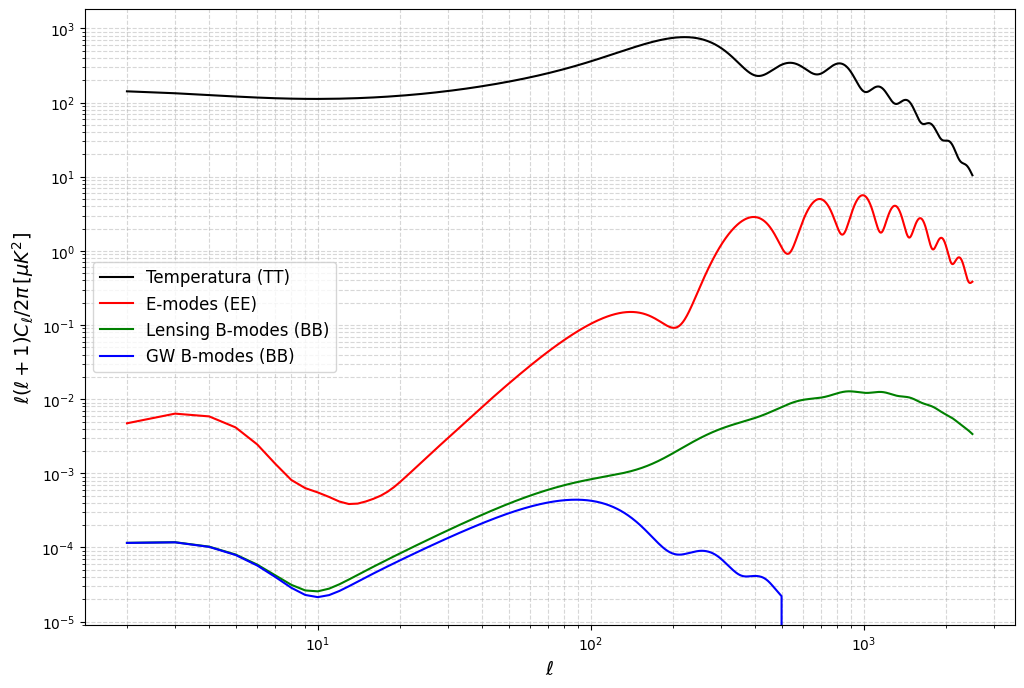

In [9]:
import matplotlib.pyplot as plt
from classy import Class
from math import pi

# Parámetros cosmológicos fijos
h = 0.67556
omega_b = 0.0225
omega_cdm = 0.12
A_s = 2.1e-9
n_s = 0.965
tau_reio = 0.06

# Inicializar CLASS
LambdaCDM = Class()
LambdaCDM.set({
    "h": h,
    "omega_b": omega_b,
    "omega_cdm": omega_cdm,
    "A_s": A_s,
    "n_s": n_s,
    "tau_reio": tau_reio,
    "r": 0.05,  # Relación tensor-escalar para GW B-modes
    "modes": "s,t",  # Incluir modos escalares y tensoriales
    "output": "tCl,pCl,lCl",  # Espectros relevantes
    "lensing": "yes",  # Incluir lensing
})
LambdaCDM.compute()

# Obtener los espectros
cls = LambdaCDM.lensed_cl(2500)
cls_tensor = LambdaCDM.raw_cl(2500)  # Espectros sin lensing para los GW B-modes

ell = cls["ell"][2:]  # Ignorar los primeros dos valores (espurios)
factor_muK2 = 1e12  # Conversión a unidades de μK^2

# Espectros escalares
clTT = cls["tt"][2:] * ell * (ell + 1) / (2 * pi) * factor_muK2
clEE = cls["ee"][2:] * ell * (ell + 1) / (2 * pi) * factor_muK2
clBB_lensing = cls["bb"][2:] * ell * (ell + 1) / (2 * pi) * factor_muK2

# Espectros tensoriales (GW B-modes)
clBB_gw = cls_tensor["bb"][2:] * ell * (ell + 1) / (2 * pi) * factor_muK2

# Graficar
plt.figure(figsize=(12, 8))

# Graficar cada observable con los colores solicitados
plt.plot(ell, clTT, label="Temperatura (TT)", color="black")
plt.plot(ell, clEE, label="E-modes (EE)", color="red")
plt.plot(ell, clBB_lensing, label="Lensing B-modes (BB)", color="green")
plt.plot(ell, clBB_gw, label="GW B-modes (BB)", color="blue")

# Configuración del gráfico
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$\ell(\ell+1)C_\ell/2\pi \, [\mu K^2]$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(which="both", linestyle="--", alpha=0.5)
plt.show()

# Liberar memoria de CLASS
LambdaCDM.empty()

12.c. Gráfico de los distintos espectros para un barrido en r (con y sin lente débil). Utilice escala logarítmica.

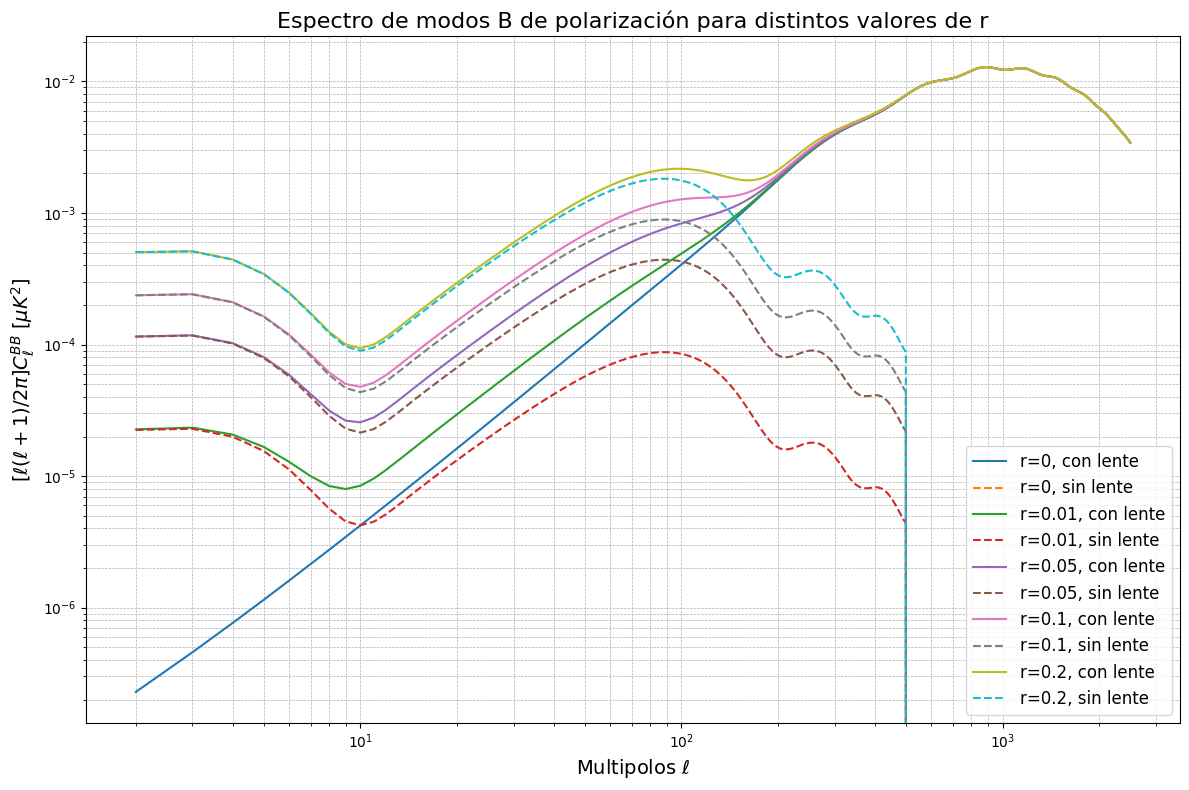

In [10]:
import matplotlib.pyplot as plt
from classy import Class
from math import pi

# Parámetros fijos
omega_b = 0.0225
omega_cdm = 0.12
h = 0.67
A_s = 2.1e-9
n_s = 0.965
tau_reio = 0.06

# Valores de r
r_values = [0, 0.01, 0.05, 0.1, 0.2]

# Crear figuras
plt.figure(figsize=(12, 8))

for r in r_values:
    # Calcular con lente
    LambdaCDM_lens = Class()
    LambdaCDM_lens.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "r": r,
        "l_max_scalars": 2500,
        "lensing": "yes",
        "output": "tCl,pCl,lCl",
        "modes": "s,t"  # Incluir modos tensoriales
    })
    LambdaCDM_lens.compute()
    
    cls_lens = LambdaCDM_lens.lensed_cl(2500)
    ell = cls_lens["ell"][2:]  # Ignorar los dos primeros valores
    clBB_lens = cls_lens["bb"][2:] * ell * (ell + 1) / (2 * pi)

    # Graficar con lente
    plt.plot(ell, clBB_lens * 1e12, label=f"r={r}, con lente")

    # Calcular sin lente
    LambdaCDM_nolens = Class()
    LambdaCDM_nolens.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "r": r,
        "l_max_scalars": 2500,
        "lensing": "no",
        "output": "tCl,pCl,lCl",
        "modes": "s,t"  # Incluir modos tensoriales
    })
    LambdaCDM_nolens.compute()

    cls_nolens = LambdaCDM_nolens.raw_cl(2500)
    clBB_nolens = cls_nolens["bb"][2:] * ell * (ell + 1) / (2 * pi)

    # Graficar sin lente
    plt.plot(ell, clBB_nolens * 1e12, linestyle="dashed", label=f"r={r}, sin lente")

    # Liberar memoria
    LambdaCDM_lens.empty()
    LambdaCDM_nolens.empty()

# Configurar el gráfico
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Multipolos $\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{BB}$ [$\mu K^2$]", fontsize=14)
plt.title("Espectro de modos B de polarización para distintos valores de r", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

Según las publicaciones de Planck 2018, la cota superior para $r$ está en 0.06, con 95% de confianza. El siguiente programa corre para valores de r tanto dentro del márgen de mediciones como por encima.

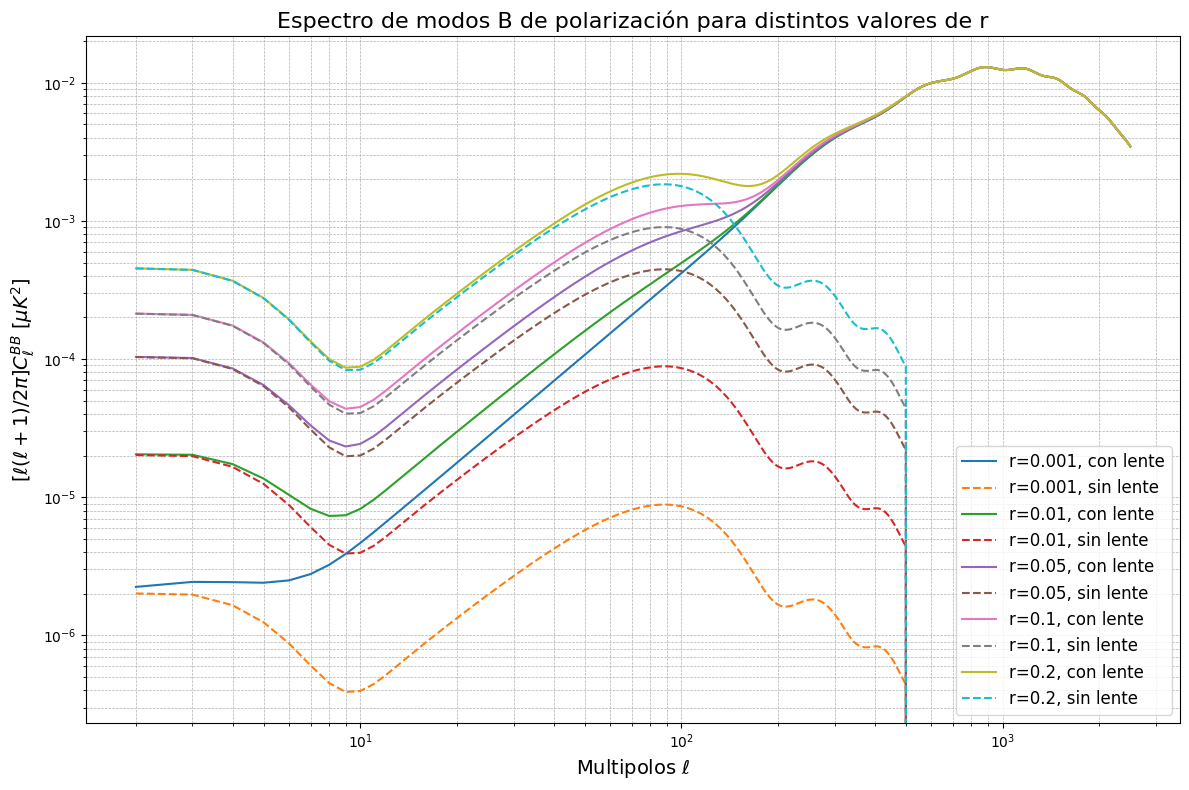

In [11]:
import matplotlib.pyplot as plt
from classy import Class
from math import pi

# Parámetros fijos
omega_b = 0.0225
omega_cdm = 0.12
h = 0.67
A_s = 2.1e-9
n_s = 0.965
tau_reio = 0.054  # Valor medido por Planck 2018

# Valores de r a explorar
r_values = [0.001, 0.01, 0.05, 0.1, 0.2]

# Crear figuras
plt.figure(figsize=(12, 8))

for r in r_values:
    # Calcular con lente
    LambdaCDM_lens = Class()
    LambdaCDM_lens.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "r": r,
        "l_max_scalars": 2500,
        "lensing": "yes",
        "output": "tCl,pCl,lCl",
        "modes": "s,t"  # Incluir modos tensoriales
    })
    LambdaCDM_lens.compute()
    
    cls_lens = LambdaCDM_lens.lensed_cl(2500)
    ell = cls_lens["ell"][2:]  # Ignorar los dos primeros valores
    clBB_lens = cls_lens["bb"][2:] * ell * (ell + 1) / (2 * pi)

    # Graficar con lente
    plt.plot(ell, clBB_lens * 1e12, label=f"r={r}, con lente")

    # Calcular sin lente
    LambdaCDM_nolens = Class()
    LambdaCDM_nolens.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "r": r,
        "l_max_scalars": 2500,
        "lensing": "no",
        "output": "tCl,pCl,lCl",
        "modes": "s,t"  # Incluir modos tensoriales
    })
    LambdaCDM_nolens.compute()

    cls_nolens = LambdaCDM_nolens.raw_cl(2500)
    clBB_nolens = cls_nolens["bb"][2:] * ell * (ell + 1) / (2 * pi)

    # Graficar sin lente
    plt.plot(ell, clBB_nolens * 1e12, linestyle="dashed", label=f"r={r}, sin lente")

    # Liberar memoria
    LambdaCDM_lens.empty()
    LambdaCDM_nolens.empty()

# Configurar el gráfico
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Multipolos $\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{BB}$ [$\mu K^2$]", fontsize=14)
plt.title("Espectro de modos B de polarización para distintos valores de r", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

<h1>Ejercicio 4</h1>

4.e Utilizando 4c, estime las posiciones de los “picos” del espectro de la correlación de temperatura de la RCF $\Delta_{TT}(l)$, es decir, las posiciones angulares y multipolares de los máximos de $\langle (\frac{\delta T}{T_0})^2 \rangle \sim \Theta_0 ^2$-

El siguiente código calcula las posiciones $l$ de los picos y las escalas angulares correspondientes, usando que $l_{peak} = \frac{\pi}{\theta_{peak}}$

Picos de las oscilaciones acústicas:
n		l			Escala angular (°)
1		293.22		0.61
2		586.43		0.31
3		879.65		0.20
4		1172.86		0.15
5		1466.08		0.12
6		1759.29		0.10
7		2052.51		0.09


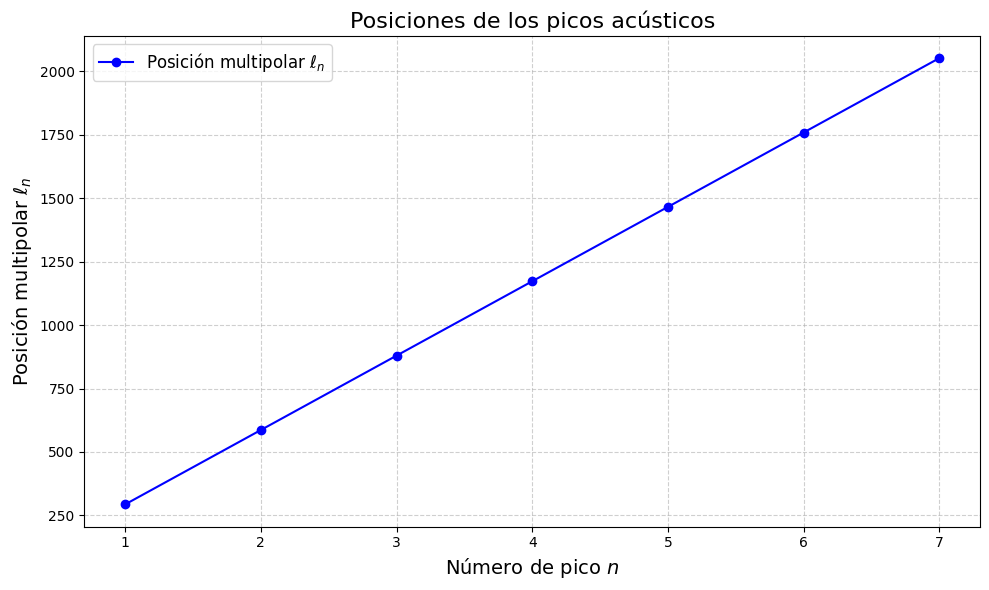

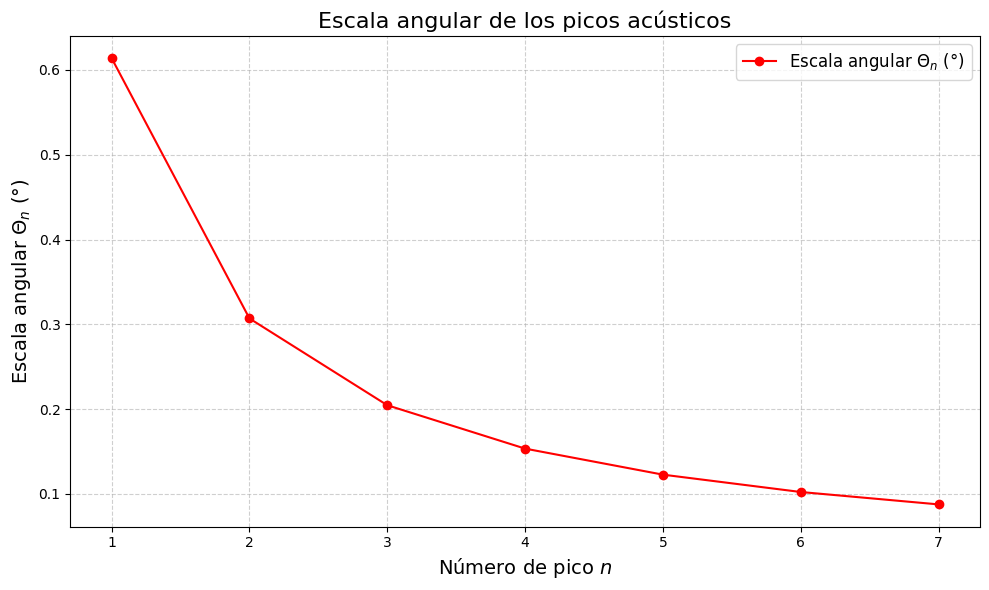

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros cosmológicos estándar
r_s = 150  # Horizonte acústico en Mpc (aproximado)
D_A = 14000  # Distancia angular en Mpc (aproximado)

# Calcular posiciones de los picos
n_values = np.arange(1, 8)  # Elijo los primeros 8 picos
l_values = (n_values * np.pi / r_s) * D_A
angular_scales = 180 / l_values  # Escalas angulares en grados

# Mostrar resultados
print("Picos de las oscilaciones acústicas:")
print("n\t\tl\t\t\tEscala angular (°)")
for n, l, theta in zip(n_values, l_values, angular_scales):
    print(f"{n}\t\t{l:.2f}\t\t{theta:.2f}")

# Graficar las posiciones de los picos
plt.figure(figsize=(10, 6))
plt.plot(n_values, l_values, marker='o', linestyle='-', color='b', label='Posición multipolar $\ell_n$')
plt.xlabel('Número de pico $n$', fontsize=14)
plt.ylabel('Posición multipolar $\ell_n$', fontsize=14)
plt.title('Posiciones de los picos acústicos', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_values, angular_scales, marker='o', linestyle='-', color='r', label='Escala angular $\Theta_n$ (°)')
plt.xlabel('Número de pico $n$', fontsize=14)
plt.ylabel('Escala angular $\Theta_n$ (°)', fontsize=14)
plt.title('Escala angular de los picos acústicos', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Recordemos que mi cálculo me había dado que $l_{peak}=n\frac{\eta_0 \pi}{r_s(\eta_*)}=n\frac{\pi 13797Mpc}{166Mpc}=261n$. Esto no coincide exactamente con el resultado numérico anterior pero la diferencia es mínima. El siguiente código compara el resultado analítico con el numérico:

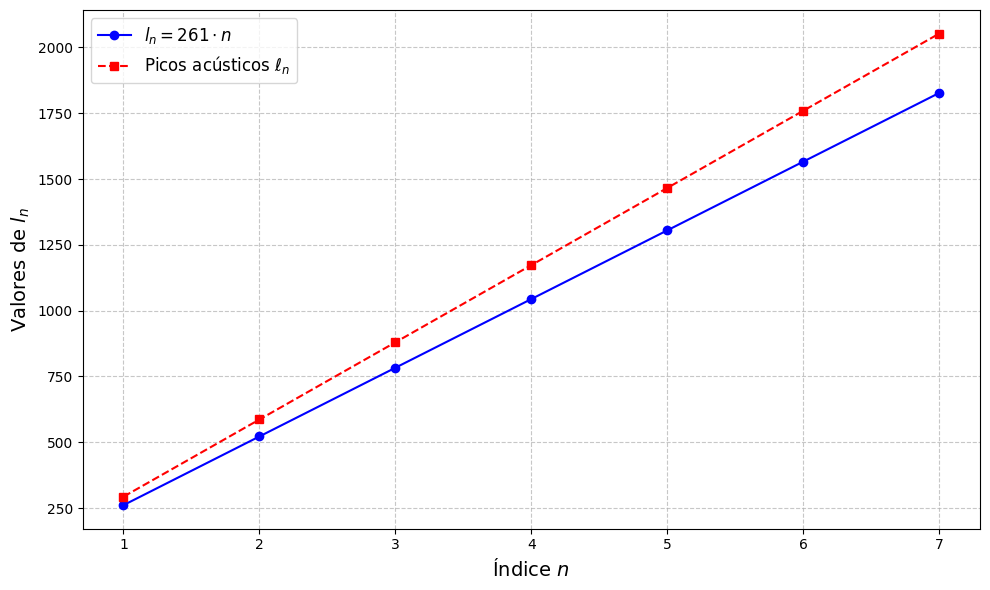

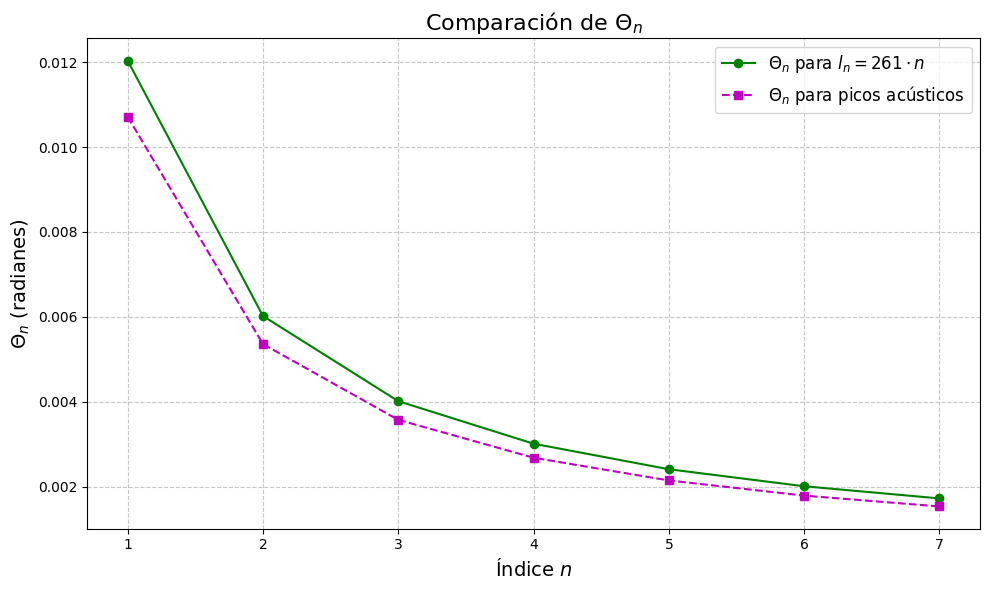

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la sucesión l_n = 261 * n
def sucesion_l(n):
    return 261 * n

# Generar valores de n y calcular l_n
n_values = range(1, 8)  # Puedes ajustar el rango según tus necesidades
l_values_sucesion = [sucesion_l(n) for n in n_values]

# Parámetros cosmológicos estándar
r_s = 150  # Horizonte acústico en Mpc (aproximado)
D_A = 14000  # Distancia angular en Mpc (aproximado)

# Calcular posiciones de los picos
n_values_cosmo = np.arange(1, 8) 
l_values_cosmo = (n_values_cosmo * np.pi / r_s) * D_A

# Calcular theta para cada l
def calcular_theta(l):
    return np.pi / l

theta_sucesion = [calcular_theta(l) for l in l_values_sucesion]
theta_cosmo = [calcular_theta(l) for l in l_values_cosmo]

# Graficar ambas sucesiones
plt.figure(figsize=(10, 6))

# Gráfica de l_n = 261 * n
plt.plot(n_values, l_values_sucesion, marker='o', linestyle='-', color='b', label='$l_n = 261 \cdot n$')

# Gráfica de los picos acústicos
plt.plot(n_values_cosmo, l_values_cosmo, marker='s', linestyle='--', color='r', label='Picos acústicos $\ell_n$')

# Etiquetas y título
plt.xlabel('Índice $n$', fontsize=14)
plt.ylabel('Valores de $l_n$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Graficar theta
plt.figure(figsize=(10, 6))

# Gráfica de theta para la sucesión l_n = 361 * n
plt.plot(n_values, theta_sucesion, marker='o', linestyle='-', color='g', label='$\Theta_n$ para $l_n = 261 \cdot n$')

# Gráfica de theta para los picos acústicos
plt.plot(n_values_cosmo, theta_cosmo, marker='s', linestyle='--', color='m', label='$\Theta_n$ para picos acústicos')

# Etiquetas y título
plt.title('Comparación de $\Theta_n$', fontsize=16)
plt.xlabel('Índice $n$', fontsize=14)
plt.ylabel('$\Theta_n$ (radianes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

4.f. Muestre/argumente que la posición del primer pico depende fuertemente de la curvatura espacial del universo. Compare posición angular y multipolar de dicho pico halladas en 4e con los resultados de Planck 2018, results. VI. Cosmological parameters, arXiv:1807.06209v1 [astro-ph.CO]

El siguiente código calcula la posición $l$ de los picos según el valor de curvatura espacial del Universo:

Para Ω_k = -0.07:
Posición del primer pico (l_1) = 303.30
Escala angular (Θ_1) = 0.59 grados
------------------------------
Para Ω_k = -0.04:
Posición del primer pico (l_1) = 298.30
Escala angular (Θ_1) = 0.60 grados
------------------------------
Para Ω_k = 0.00:
Posición del primer pico (l_1) = 293.22
Escala angular (Θ_1) = 0.61 grados
------------------------------
Para Ω_k = 0.04:
Posición del primer pico (l_1) = 288.04
Escala angular (Θ_1) = 0.62 grados
------------------------------
Para Ω_k = 0.07:
Posición del primer pico (l_1) = 282.77
Escala angular (Θ_1) = 0.64 grados
------------------------------


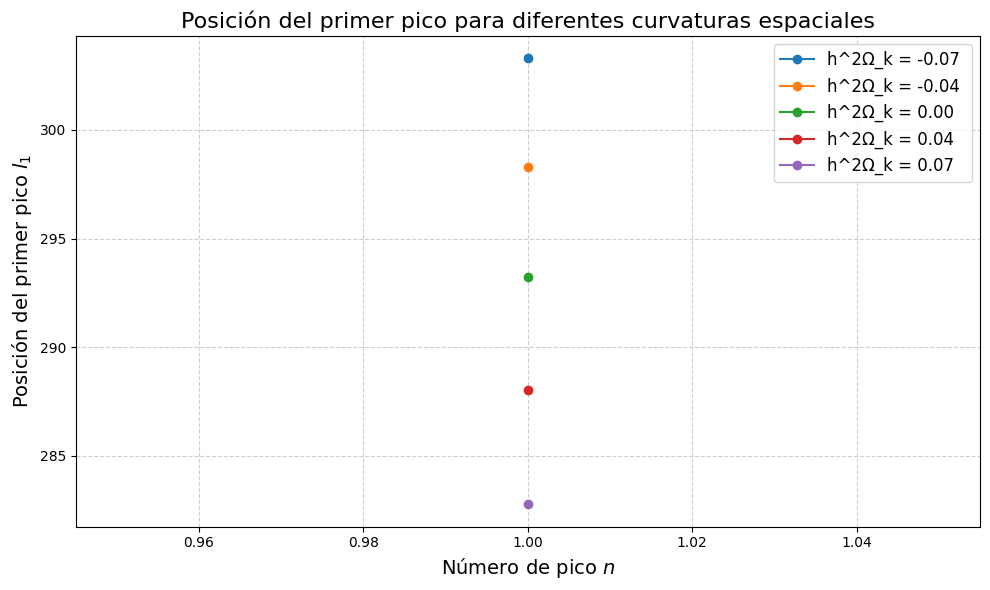

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros cosmológicos estándar
r_s = 150  # Horizonte acústico en Mpc (aproximado)
D_A = 14000  # Distancia angular en Mpc (aproximado)

# Función que ajusta la distancia angular según la curvatura espacial
def distancia_angular_curvatura(Omega_k):
    if Omega_k == 0:
        return D_A
    else:
        return D_A * np.sqrt(np.abs(1 - Omega_k))

# Valores de curvatura (Omega_k)
curvaturas = np.array([-0.07, -0.035, 0, 0.035, 0.07])  # Omega_k = 0 (plano), Omega_k > 0 (cerrado), Omega_k < 0 (abierto)

# Inicializar gráficos
plt.figure(figsize=(10, 6))

# Calcular y graficar las posiciones del primer pico para diferentes Omega_k
for Omega_k in curvaturas:
    D_A_curvada = distancia_angular_curvatura(Omega_k)
    l_1 = (np.pi / r_s) * D_A_curvada  # Fórmula para la posición del primer pico
    Theta_1 = 180 / l_1  # Escala angular en grados
    
    # Graficar la posición del primer pico
    label = f"h^2Ω_k = {Omega_k:.2f} "
    plt.plot([1], [l_1], marker='o', linestyle='-', label=label)
    
    # Mostrar la escala angular en consola
    print(f"Para Ω_k = {Omega_k:.2f}:")
    print(f"Posición del primer pico (l_1) = {l_1:.2f}")
    print(f"Escala angular (Θ_1) = {Theta_1:.2f} grados")
    print("-" * 30)

# Personalizar gráfico
plt.xlabel('Número de pico $n$', fontsize=14)
plt.ylabel('Posición del primer pico $l_1$', fontsize=14)
plt.title('Posición del primer pico para diferentes curvaturas espaciales', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Como vemos, la posición del primer pico depende fuertemente de la curvatura espacial del Universo. Esto se debe a que, si dejo una curvatura arbitraria $K \neq 0$ entonces $r_s(\eta_*)$ dependerá de $K$ fuertemente, haciendo que $l_{peak_1}$ cambie según varíe los valores de $K$.

Viendo el gráfico de Planck 2018, los primeros picos coinciden bien con los que hallé en este notebook.

<div style="text-align: center;">
    <img src="Planck2018.png" alt="Descripción de la imagen" width="700" />
    <p style="text-align: center; font-style: italic; font-size: 12px;"> Resultados de Planck 2018</p>
</div>


<h1>Ejercicio 7.a</h1>

Vimos ya que $\Theta(k,\eta_0,\mu)=\Theta(k,\eta_*,\mu)e^{ik\mu(\eta_* - \eta_0)} e^{-\tau_{rei}}$. Esta supresión solo afecta las escalas angulares chicas $\theta \sim \frac{\pi}{l} < \frac{\eta_{rei}}{\eta_0}$, que cumplen $k\eta_{rei}>1$. Esto se puede ver en el gráfico que hice al variar $\tau_{rei}$, que como vemos, para $l<10^2$, el gráfico cambia muy poco en comparación con los $l$ mayores.

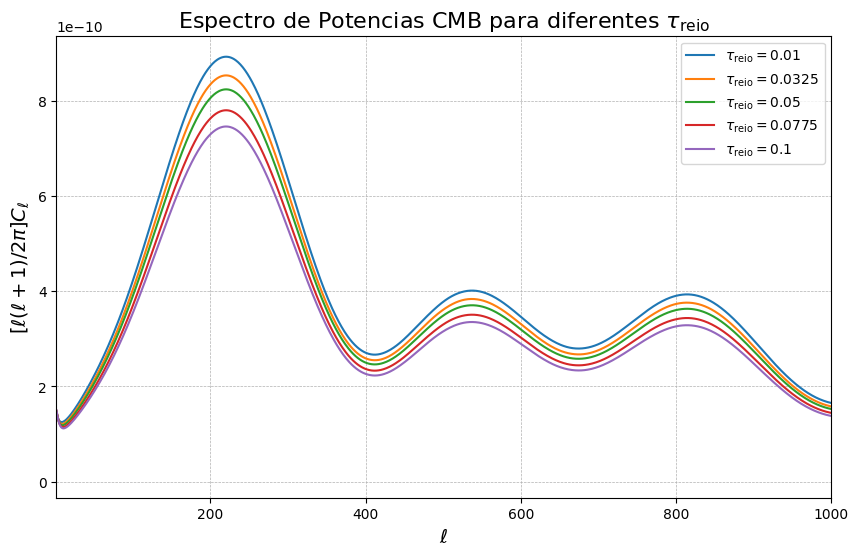

In [15]:
import matplotlib.pyplot as plt
from classy import Class
from math import pi

# Parámetros fijos
omega_b = 0.0225
omega_cdm = 0.12
h = 0.67556
A_s = 2.215e-9
n_s = 0.9619
Omega_k = 0

# Valores de tau_reio a variar
tau_reio_values = [0.01, 0.0325, 0.05, 0.0775, 0.1]

plt.figure(figsize=(10, 6))

for tau_reio in tau_reio_values:
    # Configurar CLASS
    LambdaCDM = Class()
    LambdaCDM.set({
        "omega_b": omega_b,
        "omega_cdm": omega_cdm,
        "h": h,
        "A_s": A_s,
        "n_s": n_s,
        "tau_reio": tau_reio,
        "Omega_k": Omega_k
    })
    LambdaCDM.set({"output": "tCl,pCl,lCl", "lensing": "yes"})  # Sin P_k_max_1/Mpc
    LambdaCDM.compute()
    
    # Obtener y procesar los resultados
    cls = LambdaCDM.lensed_cl(2500)
    ell = cls["ell"][2:]  # Ignorar los dos primeros valores
    clTT = cls["tt"][2:]
    
    # Graficar
    plt.plot(ell, clTT * ell * (ell + 1) / (2 * pi), label=f"$\\tau_\\text{{reio}} = {tau_reio}$")
    
    # Liberar memoria
    LambdaCDM.empty()

# Configuración del gráfico
plt.xscale("linear")
plt.yscale("linear")
plt.xlim(2, 1000)
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell$", fontsize=14)
plt.title("Espectro de Potencias CMB para diferentes $\\tau_\\text{reio}$", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

Esto ocure por lo siguiente; consideremos fotones que viajan en nuestra dirección, con una temperatura $T(1+\Theta)$, siendo $T$ la temperatura del background y $\Theta$ la perturbación. Cuando estos fotones se encuentran con una región de espesor óptico $\tau_{reio}$, solo una fracción $e^{-\tau_{reio}}$ escapará y continuará su camino. Adicionalmente, también observaremos una fracción $(1-e^{-\tau_{reio}})$ que serán fotones escatereados dentro de la región con $\tau_{reio}$. Este scattering afecta solo a escalas dentro del horizonte al tiempo de la reionización, con lo cual solo multipolos con $l$ grande ($\theta$ chicos) se verán afectados principalmente.

--------------------------------
<h1>Extra</h1>

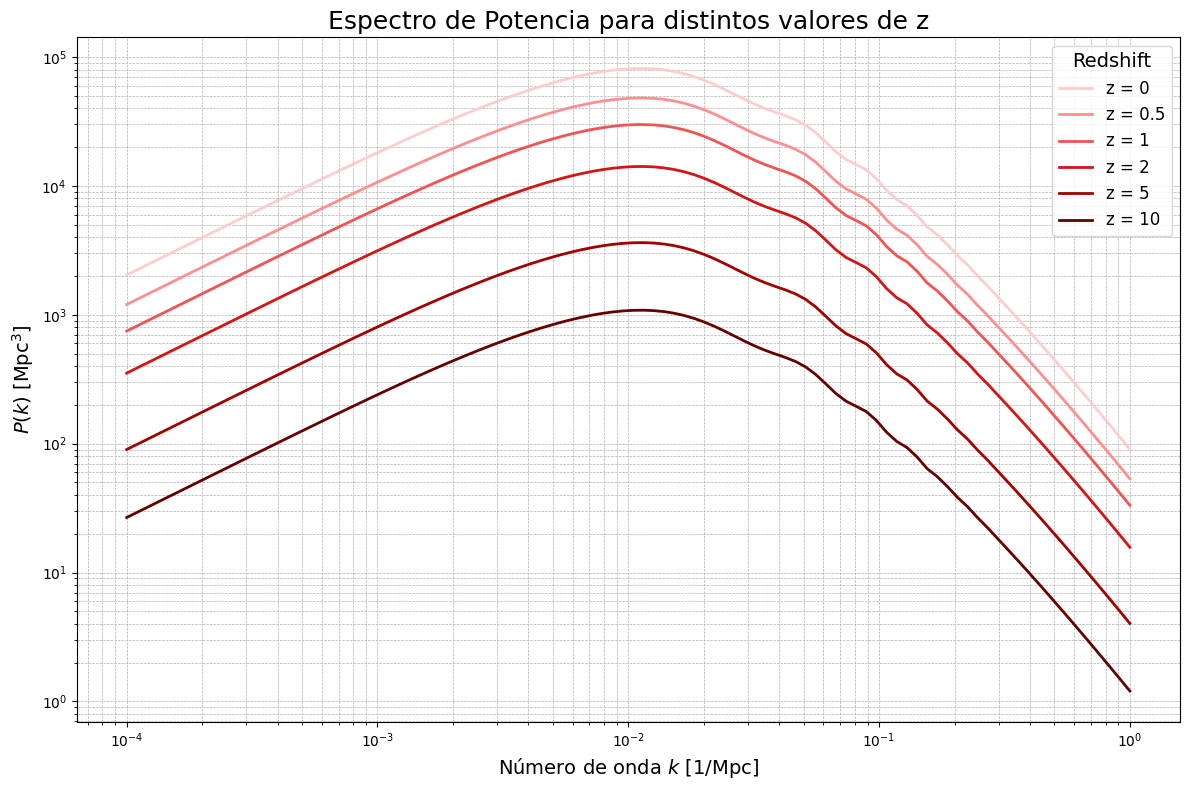

In [16]:
import matplotlib.pyplot as plt
from classy import Class
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Parámetros cosmológicos fijos
omega_b = 0.0225
omega_cdm = 0.12
h = 0.67
A_s = 2.1e-9
n_s = 0.965
tau_reio = 0.06

# Valores de redshift (z) a explorar
z_values = [0, 0.5, 1, 2, 5, 10]

# Rango de k (1/Mpc) para graficar
k_min = 1e-4
k_max = 1
k_values = np.logspace(np.log10(k_min), np.log10(k_max), 100)

# Inicializar CLASS
LambdaCDM = Class()
LambdaCDM.set({
    "omega_b": omega_b,
    "omega_cdm": omega_cdm,
    "h": h,
    "A_s": A_s,
    "n_s": n_s,
    "tau_reio": tau_reio,
    "output": "mPk",
    "P_k_max_1/Mpc": k_max,
    "z_max_pk": max(z_values)  # Asegurarse de incluir el máximo z deseado
})
LambdaCDM.compute()

# Crear figura
plt.figure(figsize=(12, 8))

# Crear un colormap armónico en tonos rojizos
cmap = LinearSegmentedColormap.from_list("reds", ["#ffcccc", "#ff6666", "#cc0000", "#660000"])
colors = cmap(np.linspace(0, 1, len(z_values)))

# Calcular y graficar P(k) para cada valor de z
for z, color in zip(z_values, colors):
    pk_values = []
    for k in k_values:
        pk_values.append(LambdaCDM.pk(k, z))
    plt.plot(k_values, pk_values, label=f"z = {z}", color=color, linewidth=2)

# Configurar el gráfico
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Número de onda $k$ [1/Mpc]", fontsize=14)
plt.ylabel(r"$P(k)$ [Mpc$^3$]", fontsize=14)
plt.title("Espectro de Potencia para distintos valores de z", fontsize=18)
plt.legend(fontsize=12, title="Redshift", title_fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Liberar memoria
LambdaCDM.empty()